## Linear Regression to determine the Price/sqft

In [1]:
! pip install scikit-learn --quiet


[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
# importing necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('clean_df.csv')
df

,Project,BHK,Location,total_floors,Carpet Area,Super Area,Price,Price Per Sqft
0,Blue Ridge,2,Blue Ridge,25,867,1145,9500000,8297
1,57 Elevate,3,57 Elevate,35,1010,1364,10000000,7331
2,Goel Ganga Avanta,3,Goel Ganga Avanta,30,1060,1480,14000000,9459
3,Shubh Tristar,3,Koregaon Park Annexe,45,1268,1650,16000000,9699
4,Basil Maximus,2,Punawale,19,749,974,6700000,6879
...,...,...,...,...,...,...,...,...
1821,Sahara Royal,2,Sahara Royal,4,980,1102,4950000,4490
1822,Mantra 7 Hills,3,Mantra 7 Hills,10,600,803,5500000,6849
1823,Kolte Patil Ivy Estate,3,Kolte Patil Ivy Estate,12,1055,1716,12500000,7284
1824,Goodwill Metropolis West,1,Goodwill Metropolis West,11,480,560,4400000,7857


In [4]:
# Taking the inputs
inputs = ['Project', 'BHK', 'total_floors', 'Super Area', 'Carpet Area', 'Price Per Sqft']

# Subsetting the DataFrame with selected columns
data = df[inputs].copy()

In [5]:
# Splitting data into features(input) and target(output)
X = data.drop('Price Per Sqft', axis=1)
y = data['Price Per Sqft']

# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [6]:
# Separating the numerical and categorical columns
cat_cols = ['Project', 'BHK']
num_cols = ['total_floors', 'Super Area', 'Carpet Area']

In [7]:
# Using One hot encoding for the categorical columns
# Creating transformers for numerical and categorical data
numerical_transformer = SimpleImputer(strategy='mean')
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Preprocessing all columns using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, num_cols),
        ('cat', categorical_transformer, cat_cols)
    ])

In [8]:
# Creating a Linear Regression model
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('regressor', LinearRegression())])

In [9]:
# Fitting the model
model.fit(X_train, y_train)

# Evaluating the model
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)

print(f"Training R^2 score: {train_score:.3f}")
print(f"Testing R^2 score: {test_score:.3f}")

Training R^2 score: 0.959
Testing R^2 score: 0.654


In [10]:
# Predicting 'Price Per Sqft' using the fitted model
predicted_price_per_sqft = model.predict(X)

# Adding predicted 'Price Per Sqft' to the DataFrame
df['Linear Regression'] = predicted_price_per_sqft

# Saving the updated DataFrame to a new CSV file
df.to_csv('Data_with_predictions.csv', index=False)


[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


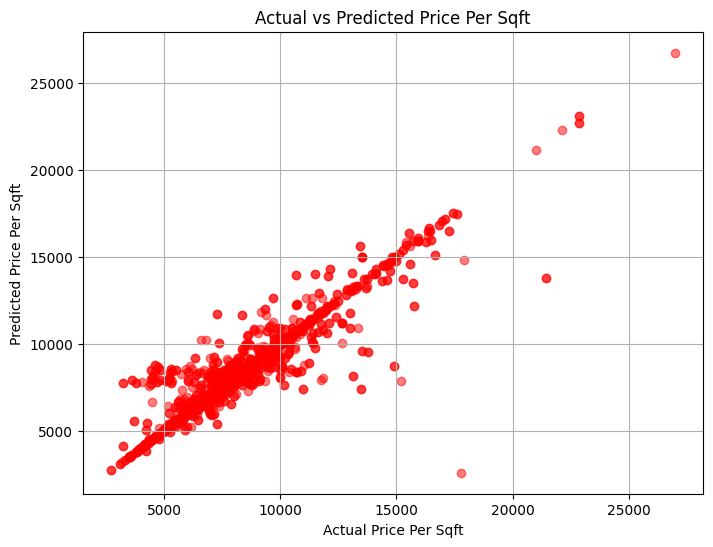

In [11]:
! pip install matplotlib --quiet
import matplotlib.pyplot as plt

# Scatter plot for actual vs predicted Price Per Sqft
plt.figure(figsize=(8, 6))
plt.scatter(df['Price Per Sqft'], df['Linear Regression'], color='red', alpha=0.5)
plt.title('Actual vs Predicted Price Per Sqft')
plt.xlabel('Actual Price Per Sqft')
plt.ylabel('Predicted Price Per Sqft')
plt.grid(True)
plt.show()

## Predicting values with the help of Random Forest Regressor

In [12]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
import pandas as pd

# Load the existing dataset with predictions
data_with_predictions = pd.read_csv('Data_with_predictions.csv')

# Taking the inputs
inputs = ['Project', 'BHK', 'total_floors', 'Super Area', 'Carpet Area', 'Price Per Sqft']

# Subsetting the DataFrame with selected columns
data = df[inputs].copy()

# Splitting data into features(input) and target(output)
X = data.drop('Price Per Sqft', axis=1)
y = data['Price Per Sqft']

# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Separating the numerical and categorical columns
cat_cols = ['Project', 'BHK']
num_cols = ['total_floors', 'Super Area', 'Carpet Area']

# Using One hot encoding for the categorical columns
# Creating transformers for numerical and categorical data
numerical_transformer = SimpleImputer(strategy='mean')
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Preprocessing all columns using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, num_cols),
        ('cat', categorical_transformer, cat_cols)
    ])

# Creating a Random Forest Regressor model
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))])

# Fitting the model
model.fit(X_train, y_train)

# Evaluating the model
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)

print(f"Training R^2 score: {train_score:.3f}")
print(f"Testing R^2 score: {test_score:.3f}")

# Predicting 'Price Per Sqft' using the fitted model
predicted_price_per_sqft = model.predict(X)

# Adding predicted 'Price Per Sqft' to the DataFrame
data_with_predictions['Random Forest'] = predicted_price_per_sqft

# Save the updated DataFrame back to the same 'Data_with_predictions.csv' file
data_with_predictions.to_csv('Data_with_predictions.csv', index=False)


Training R^2 score: 0.952
Testing R^2 score: 0.704


## Prediction of Price/SQFT using Decision Trees

In [13]:
from sklearn.tree import DecisionTreeRegressor
import pandas as pd

# Reading the existing 'Data_with_predictions.csv' file
dff = pd.read_csv('Data_with_predictions.csv')

# Creating a Decision Tree Regressor model
model_decision_tree = Pipeline(steps=[('preprocessor', preprocessor),
                                      ('regressor', DecisionTreeRegressor(random_state=42))])

# Fitting the model
model_decision_tree.fit(X_train, y_train)

# Evaluating the model
train_score_dt = model_decision_tree.score(X_train, y_train)
test_score_dt = model_decision_tree.score(X_test, y_test)

print(f"Decision Tree Training R^2 score: {train_score_dt:.3f}")
print(f"Decision Tree Testing R^2 score: {test_score_dt:.3f}")

# Predicting 'Price Per Sqft' using the fitted Decision Tree model
predicted_price_per_sqft_dt = model_decision_tree.predict(X)

# Adding predicted 'Price Per Sqft' to the DataFrame
dff['Decision Tree'] = predicted_price_per_sqft_dt

# Saving the updated DataFrame to the same CSV file
dff.to_csv('Data_with_predictions.csv', index=False)


Decision Tree Training R^2 score: 1.000
Decision Tree Testing R^2 score: 0.699


## Final look at the dataset for the predicted values

In [14]:
import pandas as pd
final_data = pd.read_csv('Data_with_predictions.csv')
final_data

,Project,BHK,Location,total_floors,Carpet Area,Super Area,Price,Price Per Sqft,Linear Regression,Random Forest,Decision Tree
0,Blue Ridge,2,Blue Ridge,25,867,1145,9500000,8297,8614.849216,8200.95,8297.0
1,57 Elevate,3,57 Elevate,35,1010,1364,10000000,7331,7828.302213,7478.12,7331.0
2,Goel Ganga Avanta,3,Goel Ganga Avanta,30,1060,1480,14000000,9459,9475.271471,9181.02,9459.0
3,Shubh Tristar,3,Koregaon Park Annexe,45,1268,1650,16000000,9699,8668.770449,9579.99,9699.0
4,Basil Maximus,2,Punawale,19,749,974,6700000,6879,6684.200200,7261.77,6879.0
...,...,...,...,...,...,...,...,...,...,...,...
1821,Sahara Royal,2,Sahara Royal,4,980,1102,4950000,4490,8154.096341,6638.31,8582.0
1822,Mantra 7 Hills,3,Mantra 7 Hills,10,600,803,5500000,6849,6923.223192,6046.40,6849.0
1823,Kolte Patil Ivy Estate,3,Kolte Patil Ivy Estate,12,1055,1716,12500000,7284,7412.625710,7478.52,7284.0
1824,Goodwill Metropolis West,1,Goodwill Metropolis West,11,480,560,4400000,7857,7851.999370,7079.78,7857.0
